<a href="https://colab.research.google.com/github/lenyagrigorenko/Hakaton_nto/blob/main/baselinehaka_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и загрузка библиотек

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Примечание: это более быстрый способ установки detector2 в Colab, но он не включает все функции (например, скомпилированные операторы).
# См. https://detectron2.readthedocs.io/tutorials/install.html для полных инструкций по установке
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15832, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 15832 (delta 22), reused 10 (delta 10), pack-reused 15788 (from 4)
Receiving objects: 100% (15832/15832), 6.40 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (11526/11526), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your en

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
import matplotlib.pyplot as plt

# Загрузка данных

In [ ]:
! wget https://storage.yandexcloud.net/ds-ods/files/files/77dd3242/train_annotations.json
! wget https://storage.yandexcloud.net/ds-ods/files/files/edd91118/train1.zip
! wget https://storage.yandexcloud.net/ds-ods/files/files/e5a98368/train2.zip
! wget https://storage.yandexcloud.net/ds-ods/files/files/a95eacf7/train3.zip
! wget https://storage.yandexcloud.net/ds-ods/files/files/a9a3642d/train4.zip
! wget https://storage.yandexcloud.net/ds-ods/files/files/cbdba63e/val_annotations.json
! wget https://storage.yandexcloud.net/ds-ods/files/files/adacb253/val.zip
! wget https://storage.yandexcloud.net/ds-ods/files/files/2ad601fd/test.zip

--2024-12-25 16:17:11--  https://storage.yandexcloud.net/ds-ods/files/files/77dd3242/train_annotations.json
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 362313284 (346M) [application/json]
Saving to: ‘train_annotations.json’

train_annotations.j 100%[===================>] 345.53M  14.1MB/s    in 25s     

2024-12-25 16:17:37 (13.8 MB/s) - ‘train_annotations.json’ saved [362313284/362313284]

--2024-12-25 16:17:37--  https://storage.yandexcloud.net/ds-ods/files/files/edd91118/train1.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 974593914 (929M) [application/x-zip-compressed]
Saving to:

In [ ]:
! unzip train1.zip
! unzip train2.zip
! unzip train3.zip
! unzip train4.zip
! unzip val.zip
! unzip test.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: test/b98f317b5563c442c1e45ef316122d0f.JPG  
  inflating: test/b264ef3bcf05cd597ce1b65f390b9f74.JPG  
  inflating: test/b423f1024f672b06f6a761ab521ac9a5.JPG  
  inflating: test/b402a185e2c786a961df4fb846aede82.JPG  
  inflating: test/b0275affacc80d93438d7c263487b9d9.JPG  
  inflating: test/b98eef7467620a325977f364446b9dac.JPG  
  inflating: test/b617e51f7d13340340300c53099f3ad7.JPG  
  inflating: test/b572e26b8397cbf95c5fb01b62187822.JPG  
  inflating: test/b503b64454d1348b9cba32f6e12c99e5.JPG  
  inflating: test/b793aa64a811d13266542749ddf24e81.JPG  
  inflating: test/b569eef7f489c00cd5bdd73aac114d24.JPG  
  inflating: test/b494f4113e714ef7c3dbfd545142acfd.JPG  
  inflating: test/b820f8e0be7a07cd2810075b98b861a3.JPG  
  inflating: test/b725a656a567ec232c4ab447d6893488.JPG  
  inflating: test/b02044e85cc18af37c3e6dbb4cc29cee.JPG  
  inflating: test/b859c04614f227125bf31aa9ddefa584.JPG  
  inflating: test/b9

In [ ]:
!mkdir train

In [ ]:
import shutil
import os

In [ ]:
train_path = "train"
for folder_name in ["train1", "train2", "train3", "train4"]:
  for file_name in os.listdir(folder_name):
    src = os.path.join(folder_name, file_name)
    shutil.move(src, train_path)

In [ ]:
import json

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("animal_train", {}, "train_annotations.json", "train")
register_coco_instances("animal_val", {}, "val_annotations.json", "val")

In [ ]:
animal_metadata = MetadataCatalog.get('animal_val')
dataset_dicts = DatasetCatalog.get("animal_val")

[12/25 16:25:29 d2.data.datasets.coco]: Loading val_annotations.json takes 7.37 seconds.
WARNING [12/25 16:25:29 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/25 16:25:29 d2.data.datasets.coco]: Loaded 8557 images in COCO format from val_annotations.json
WARNING [12/25 16:25:29 d2.data.datasets.coco]: Filtered out 2 instances without valid segmentation. There might be issues in your dataset generation process.  Please check https://detectron2.readthedocs.io/en/latest/tutorials/datasets.html carefully


Визуализируем изображения с разметкой

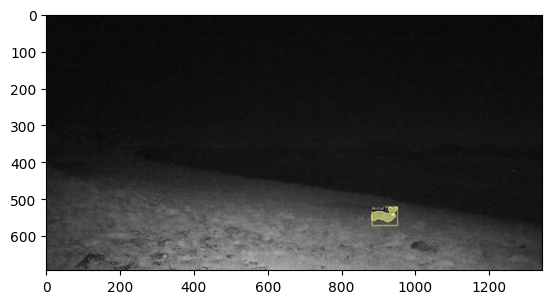

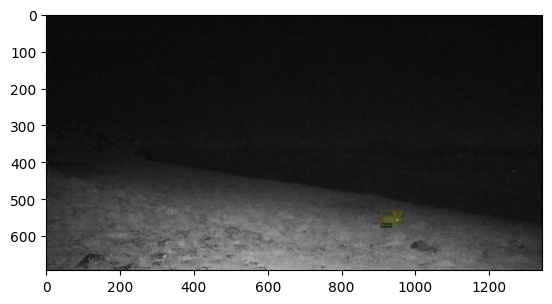

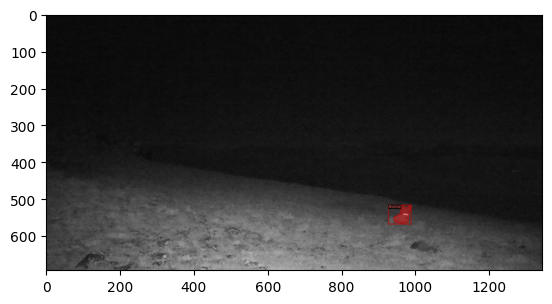

In [ ]:
for d in dataset_dicts[:3]:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=animal_metadata, scale=1)
    out = visualizer.draw_dataset_dict(d)
    plt.imshow(out.get_image()[:, :, ::])
    plt.show()

In [ ]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as tt

from PIL import Image
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.models import ResNet18_Weights
from tqdm.notebook import tqdm


# Зафиксируем сиды, чтобы обучение было воспроизводимым.
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(1001)

# Обучение модели инстанс сегментации

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.engine import BestCheckpointer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("animal_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 100
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/25 16:26:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 136MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/25 16:27:04 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/25 16:27:25 d2.utils.events]:  eta: 0:00:44  iter: 19  total_loss: 1.262  loss_cls: 0.3916  loss_box_reg: 0.1356  loss_mask: 0.6746  loss_rpn_cls: 0.003645  loss_rpn_loc: 0.003518    time: 0.5883  last_time: 0.5440  data_time: 0.0492  last_data_time: 0.0064   lr: 0.00019081  max_mem: 2405M
[12/25 16:27:48 d2.utils.events]:  eta: 0:00:36  iter: 39  total_loss: 0.7184  loss_cls: 0.1119  loss_box_reg: 0.1564  loss_mask: 0.3666  loss_rpn_cls: 0.001584  loss_rpn_loc: 0.004194    time: 0.6102  last_time: 0.6492  data_time: 0.0204  last_data_time: 0.0224   lr: 0.00039061  max_mem: 2405M
[12/25 16:28:02 d2.utils.events]:  eta: 0:00:24  iter: 59  total_loss: 0.3873  loss_cls: 0.07462  loss_box_reg: 0.1378  loss_mask: 0.162  loss_rpn_cls: 0.001159  loss_rpn_loc: 0.003389    time: 0.6352  last_time: 0.6288  data_time: 0.0228  last_data_time: 0.0083   lr: 0.00059041  max_mem: 2406M
[12/25 16:28:15 d2.utils.events]:  eta: 0:00:12  iter: 79  total_loss: 0.343  loss_cls: 0.05586  loss_box_reg: 0.

In [18]:
! pip install pycocotools

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [19]:
import locale
def getpreferredencoding(do_setlocale=True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install pycocotools

In [20]:
import pycocotools

# Формирование файла с предсказанием

In [ ]:
from tqdm import tqdm
# Папка с тестовыми изображениями
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
predictor = DefaultPredictor(cfg)

test_folder = "test"
output_folder = "output"  # Папка для сохранения результатов
os.makedirs(output_folder, exist_ok=True)

# Список для хранения предсказаний в нужном формате
predictions = []

# Обработка изображений
for file_name in tqdm(os.listdir(test_folder)):
    image_path = os.path.join(test_folder, file_name)
    image = cv2.imread(image_path)

    # Выполнение предсказания
    outputs = predictor(image)

    # Получаем сегментацию и другие данные
    instances = outputs["instances"].to("cpu")
    # print(instances)
    pred_classes = instances.pred_classes.tolist()  # Классы объектов
    pred_boxes = instances.pred_boxes.tensor.tolist()  # Координаты bbox
    pred_scores = instances.scores.tolist()  # Скоринг предсказаний
    pred_segmentation = instances.pred_masks.tolist()  # Сегментация

    # Сохраняем предсказания для каждого объекта в изображении
    for i in range(len(pred_classes)):
        # pred_segmentation = instances.pred_masks.tolist()
        rle = pycocotools.mask.encode(np.asfortranarray(pred_segmentation[i]))
        predictions.append({
            "image_name": file_name,
            "category_id": pred_classes[i],  # ID категории
            "bbox": pred_boxes[i],  # Координаты bounding box
            "score": pred_scores[i],  # Оценка уверенности
            "segmentation": {
                "size" : rle["size"],
                "counts" : str(rle["counts"])
            }  # Сегментация в формате RLE
        })


# Сохранение предсказаний в JSON
predictions_file = os.path.join(output_folder, "submission.json")
with open(predictions_file, "w") as f:
    json.dump(predictions, f, indent=4)

print(f"Обработка завершена. Результаты сохранены в папке: {output_folder}")


[12/25 16:33:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))